In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import pandas as pd

case = pd.read_csv('2. EDA_원인분석, 고유값.csv', header = 0, index_col = 0)
case.head()

,사고명,기상상태,인적사고,물적사고,작업프로세스,사고경위,사고원인,구체적 사고원인,사망자수,부상자수,...,공종소분류,객체대분류,객체소분류,시설장소,위치장소,부위위치,시설물 대분류,시설물 중분류,시설물 소분류(상세),시설물 소분류
1,외남동162 근린생활시설 신축공사,날씨 : 맑음기온 : 23℃습도 : 20%,물체에 맞음,없음,상차 및 하역작업,철골자재(데크플레이트(슈퍼데크))를 화물차에서 지게차로 하차 적재위치에 내려놓는 중...,부주의,받침대 설치 시 측면에서 설치를 해야하나 지게차 앞에서 받침대를 설치,1,0,...,철골공사,건설자재,데크플레이트,근린생활시설,외부,하역,건축,건축물,"근린생활시설(연면적 : 455.46㎡, 지상 2층, 지하 0층)",근린생활시설
2,보라동 391-23 근린생활시설 및 다세대주택 신축공사 작업 착수 전 사망사고,날씨 : 흐림기온 : 22℃습도 : 50%,질병,없음,기타,2022년04월27일 오전07시20분경 보라동 근린생활시설 및 다세대주택 신축공사 ...,기타,신축공사 현장 내 대기실에서 작업 착수 전 동료들과 모여 대기중 송**이 갑자기 쓰...,1,0,...,기타,질병,질병,공동주택,작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망,작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망,건축,건축물,"공동주택(연면적 : 709.85㎡, 지상 5층, 지하 0층)",공동주택
3,송산그린시티 EB4블록 형틀공 추락사고,날씨 : 흐림기온 : 15℃습도 : 74%,찔림,없음,설치작업,2022.04.22 금요일 09시 10분경 202동 10호 다용도실에서 전기작업을 ...,기타,현장 정리정돈 미흡 및 근로자 부주의,1,0,...,가설공사,가시설,거푸집,기타,내부,상부(위),건축,건축물,"기타(연면적 : 24,161.30㎡, 지상 3층, 지하 1층)",기타
4,화성비봉 공공주택지구 조성공사,날씨 : 맑음기온 : 15℃습도 : 51%,질병,없음,기타,일용근로자인 김**씨는 2022년 04월 20일 (수요일) 오전 06시57 분경에 ...,기타,개인 질병(심근경색)에 따른 사고,1,0,...,기타,질병,질병,부지조성,내부,상부(위),토목,기타,부지조성,부지조성
5,상도동 243-19 신축공사 추락사고,날씨 : 흐림기온 : 19℃습도 : 25%,떨어짐(5미터 이상 ~ 10미터 미만),없음,해체작업,외부 비계해체작업 준비 중 작업자(비계공)가 3층 계단창을 통해 비계 및 작업발판으...,"복장, 개인보호구의 부적절한 사용",안전고리 체결 후 작업준비가 이루어져야 했으나 안전고리 미체결 등으로 사고가 발생한...,1,0,...,가설공사,가시설,작업발판,단독주택,외벽,고소,건축,건축물,"단독주택(연면적 : 284.06㎡, 지상 4층, 지하 1층)",단독주택


# **1. 인적사고**
---

In [3]:
case['인적사고'].unique()

array(['물체에 맞음', '질병', '찔림', '떨어짐(5미터 이상 ~ 10미터 미만)', '떨어짐(10미터 이상)',
       '떨어짐(3미터 이상 ~ 5미터 미만)', '끼임', '넘어짐(기타)', '넘어짐(미끄러짐)', '절단, 베임',
       '떨어짐(2미터 미만)', '부딪힘', '넘어짐(물체에 걸림)', '떨어짐(2미터 이상 ~ 3미터 미만)', '기타',
       '분류불능', '깔림', '없음', '화상', '질식', '교통사고', '떨어짐(분류불능)', '감전', nan],
      dtype=object)

In [4]:
case['인적사고'] = case['인적사고'].str.split('(').str[0]

In [5]:
case['인적사고'].unique()

array(['물체에 맞음', '질병', '찔림', '떨어짐', '끼임', '넘어짐', '절단, 베임', '부딪힘', '기타',
       '분류불능', '깔림', '없음', '화상', '질식', '교통사고', '감전', nan], dtype=object)

In [7]:
import numpy as np

# nan 값을 ''로 대체 
case['인적사고'] = case['인적사고'].replace(np.nan, '없음')

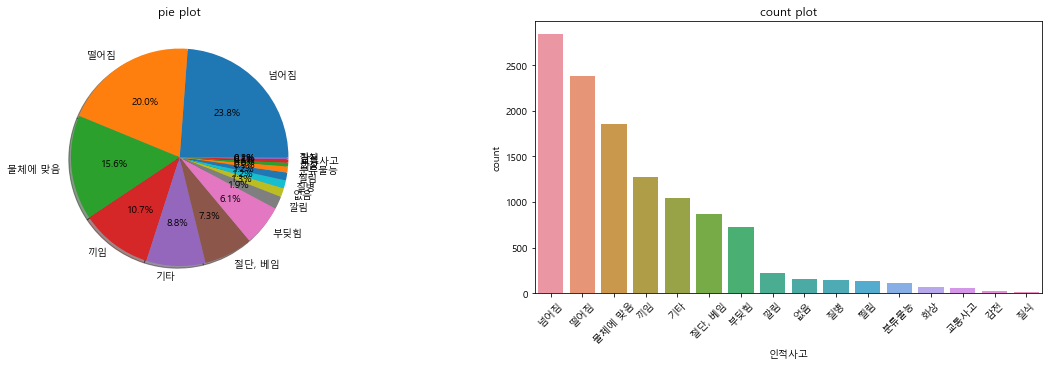

In [8]:
f, ax = plt.subplots(1, 2, figsize = (20,5))

case['인적사고'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('pie plot')
ax[0].set_ylabel('')

sns.countplot(x = '인적사고', data = case, order = case['인적사고'].value_counts().index, ax = ax[1])
ax[1].set_title('count plot')
plt.xticks(rotation = 45)

plt.show()

# **2. 물적사고**
---

In [9]:
case['물적사고'].unique()

array(['없음', '붕괴', '화재', '기타', '전도', '충돌', '낙하', '파열, 파단', '탈락', nan,
       '폭발'], dtype=object)

In [10]:
# nan 값을 ''로 대체 
case['물적사고'] = case['물적사고'].replace(np.nan, '없음')

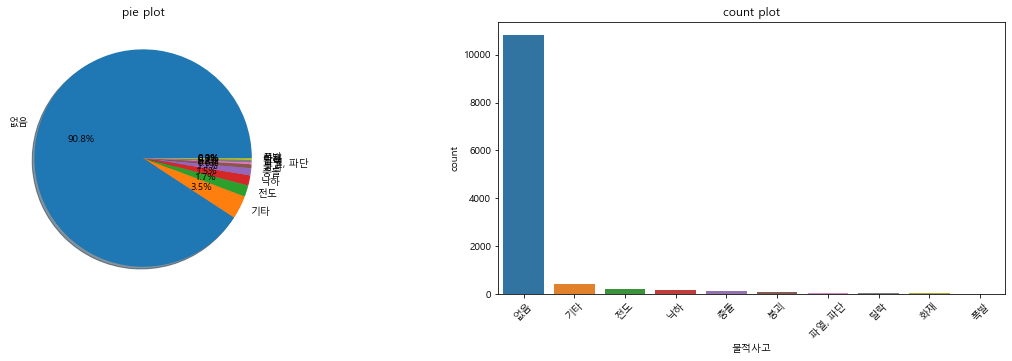

In [11]:
f, ax = plt.subplots(1, 2, figsize = (20,5))

case['물적사고'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('pie plot')
ax[0].set_ylabel('')

sns.countplot(x = '물적사고', data = case, order = case['물적사고'].value_counts().index, ax = ax[1])
ax[1].set_title('count plot')
plt.xticks(rotation = 45)

plt.show()

# **3. 사망자, 부상자 비율**
---

In [13]:
case['피해인원수'] = case['사망자수'] + case['부상자수']

1        1
2        1
3        1
4        1
5        1
        ..
11925    1
11926    1
11927    1
11928    1
11929    1
Name: 피해인원수, Length: 11921, dtype: int64

In [26]:
print('총 부상자 수 : ', case['부상자수'].sum())
print('총 사망자 수 : ', case['사망자수'].sum())
print('총 피해인원 수 : ', case['피해인원수'].sum())

총 부상자 수 :  11444
총 사망자 수 :  704
총 피해인원 수 :  12148


In [27]:
damage = case.groupby(['공종대분류', '공종소분류']).sum()
damage

사망자수  부상자수  피해인원수
공종대분류 공종소분류                          
건축    가설공사            29   816    845
      건축 토공사          20   286    306
      건축물 부대공사        14   251    265
      금속공사             5    95    100
      도장공사            22   145    167
      목공사              2   128    130
      미장공사            15   242    257
      방수공사             7    88     95
      수장공사            45   305    350
      조경공사             1    43     44
      조적공사             4   145    149
      지반조사             1    11     12
      지붕 및 홈통공사       19    65     84
      지정공사             3    35     38
      창호 및 유리공사       17   113    130
      철골공사            38   314    352
      철근콘크리트공사        93  2740   2833
      타일 및 돌공사         8   235    243
      특수 건축물공사         0     5      5
      해체 및 철거공사       54   413    467
기계설비  가설공사             1    16     17
      기계설비공사          22   383    405
      해체 및 철거공사        3     8     11
기타    기타              92  1471   1563
산업설비  가설공사             0    12     12
      산업설비공사           2   190    192
      해체 및 철거공사        1     7      8
전기설비  가설공사             0     6      6
      전기설비공사          15   289    304
      해체 및 철거공사        0     1      1
토목    가설공사            15   444    459
      강구조물공사           2    21     23
      관공사             29   284    313
      관공사 부대공사         7    87     94
      교량공사            13   185    198
      댐 및 제방공사         1     9     10
      도로 및 포장공사       17   195    212
      말뚝공사             1    46     47
      지반개량공사           3    21     24
      지반조사             0    11     11
      철근콘크리트공사         9   378    387
      철도 및 궤도공사        3    39     42
      터널공사            12   139    151
      토공사             36   386    422
      프리캐스트 콘크리트공사     1     5      6
      하천공사            10   103    113
      항만공사             4    80     84
      해체 및 철거공사        8   139    147
통신설비  통신설비공사           0     6      6

In [31]:
damage['사망 비율'] = damage['사망자수'] / case['사망자수'].sum() * 100
damage['부상 비율'] = damage['부상자수'] / case['부상자수'].sum() * 100
damage

사망자수  부상자수  피해인원수      사망 비율      부상 비율
공종대분류 공종소분류                                                
건축    가설공사            29   816    845   4.119318   7.130374
      건축 토공사          20   286    306   2.840909   2.499126
      건축물 부대공사        14   251    265   1.988636   2.193289
      금속공사             5    95    100   0.710227   0.830129
      도장공사            22   145    167   3.125000   1.267039
      목공사              2   128    130   0.284091   1.118490
      미장공사            15   242    257   2.130682   2.114645
      방수공사             7    88     95   0.994318   0.768962
      수장공사            45   305    350   6.392045   2.665152
      조경공사             1    43     44   0.142045   0.375743
      조적공사             4   145    149   0.568182   1.267039
      지반조사             1    11     12   0.142045   0.096120
      지붕 및 홈통공사       19    65     84   2.698864   0.567983
      지정공사             3    35     38   0.426136   0.305837
      창호 및 유리공사       17   113    130   2.414773   0.987417
      철골공사            38   314    352   5.397727   2.743796
      철근콘크리트공사        93  2740   2833  13.210227  23.942677
      타일 및 돌공사         8   235    243   1.136364   2.053478
      특수 건축물공사         0     5      5   0.000000   0.043691
      해체 및 철거공사       54   413    467   7.670455   3.608878
기계설비  가설공사             1    16     17   0.142045   0.139811
      기계설비공사          22   383    405   3.125000   3.346732
      해체 및 철거공사        3     8     11   0.426136   0.069906
기타    기타              92  1471   1563  13.068182  12.853897
산업설비  가설공사             0    12     12   0.000000   0.104858
      산업설비공사           2   190    192   0.284091   1.660259
      해체 및 철거공사        1     7      8   0.142045   0.061167
전기설비  가설공사             0     6      6   0.000000   0.052429
      전기설비공사          15   289    304   2.130682   2.525341
      해체 및 철거공사        0     1      1   0.000000   0.008738
토목    가설공사            15   444    459   2.130682   3.879762
      강구조물공사           2    21     23   0.284091   0.183502
      관공사             29   284    313   4.119318   2.481650
      관공사 부대공사         7    87     94   0.994318   0.760224
      교량공사            13   185    198   1.846591   1.616568
      댐 및 제방공사         1     9     10   0.142045   0.078644
      도로 및 포장공사       17   195    212   2.414773   1.703950
      말뚝공사             1    46     47   0.142045   0.401957
      지반개량공사           3    21     24   0.426136   0.183502
      지반조사             0    11     11   0.000000   0.096120
      철근콘크리트공사         9   378    387   1.278409   3.303041
      철도 및 궤도공사        3    39     42   0.426136   0.340790
      터널공사            12   139    151   1.704545   1.214610
      토공사             36   386    422   5.113636   3.372947
      프리캐스트 콘크리트공사     1     5      6   0.142045   0.043691
      하천공사            10   103    113   1.420455   0.900035
      항만공사             4    80     84   0.568182   0.699056
      해체 및 철거공사        8   139    147   1.136364   1.214610
통신설비  통신설비공사           0     6      6   0.000000   0.052429